### Power Calculations for Two-Sample Test for Proportions

In [151]:
library(ggplot2)
library(dplyr)

### Compute the power of the two-sample test for proportions, or determine parameters to obtain a target power. 
power.prop.test(n = NULL, p1 = NULL, p2 = NULL, sig.level = 0.05,
                power = NULL,
                alternative = c("two.sided", "one.sided"),
                strict = FALSE, tol = .Machine$double.eps^0.25)

n = number of observations (per group)<br>
p1 = probability in one group <br>
p2 = probability in other group <br>
sig.level = significance level (Type I error probability) <br>
power = power of test (1 minus Type II error probability) <br>
alternative = one- or two-sided test. Can be abbreviated. <br>
strict = use strict interpretation in two-sided case <br>
tol = numerical tolerance used in root finding, the default providing (at least) four significant digits.<br>

### How does the number of required observations vary for a range of minimal detectable differences?

The smaller the change you want to detect, the more samples you need.

In [333]:
# Determine the range of MDE
var = seq(from = 0.01, to = 0.03, length.out = 1000)

In [334]:
# Hold the rest of the variables constant
p1 = 0.10
sig.level = 0.05
power = 0.8

In [335]:
# Create dataframe to show the data
data <- data.frame(matrix(NA, nrow = length(var), ncol = 6))
names(data) <- c("n", "p1", "p2", "sig.level", "power", "mde")

In [336]:
# fill the dataframe
data$p1 = p1
data$sig.level = sig.level
data$power = power
data$mde = var
data$p2 = data$p1 - data$mde

In [337]:
# calculate the number of observations needed to satisfy the power and siginificance level requirements
data$n <- sapply(data$mde, function(x) power.prop.test(sig.level = sig.level, p1=p1, p2=p1-x, power= power )$n)

In [338]:
# set size of chart
options(repr.plot.width=5, repr.plot.height=3)

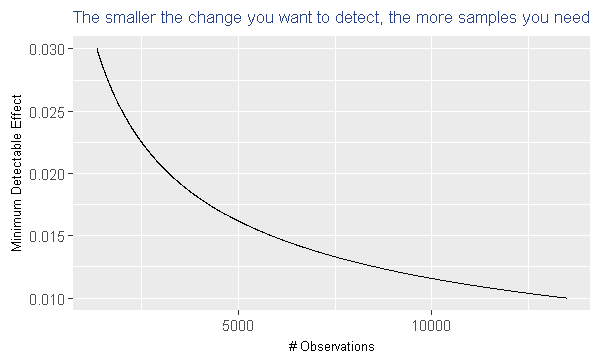

In [339]:
plot <- ggplot(data, aes(x= n, y= mde)) + 
    geom_line() +
    ggtitle("The smaller the change you want to detect, the more samples you need") +
    xlab("# Observations") + 
    ylab("Minimum Detectable Effect") + 
    theme(
        plot.title = element_text(size=10, color = "royalblue4"),
        axis.title.x = element_text(size=8),
        axis.title.y = element_text(size=8))
plot

In [160]:
rm(list=ls())

### How does the number of required observations change for different baseline conversion rate?

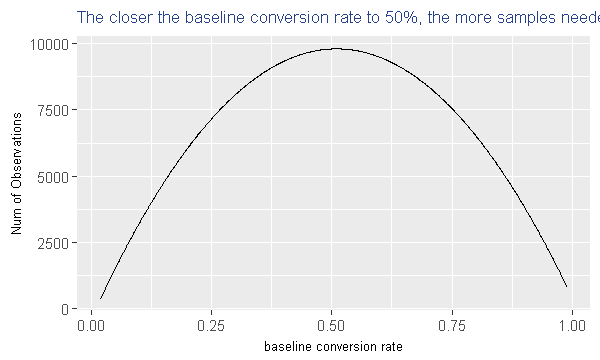

In [341]:
# Determine the range of baseline probability
var = seq(from = 0.02, to = 0.99, length.out = 1000)

# Hold the rest of the variables constant
p1 = var
sig.level = 0.05
power = 0.8
mde = 0.02

# Create dataframe to show the data
data <- data.frame(matrix(NA, nrow = length(var), ncol = 6))
names(data) <- c("n", "p1", "p2", "sig.level", "power", "mde")

# fill the dataframe
data$p1 = p1
data$sig.level = sig.level
data$power = power
data$mde = mde
data$p2 = data$p1 - data$mde

# calculate the number of observations needed to satisfy the power and siginificance level requirements
data$n <- sapply(data$p1, function(x) power.prop.test(sig.level=sig.level, 
                                                      p1=x, 
                                                      p2=x-mde, 
                                                      power=power)$n)

plot <- ggplot(data, aes(x= p1, y= n)) + 
    geom_line() +
    ggtitle("The closer the baseline conversion rate to 50%, the more samples needed") +
    xlab("baseline conversion rate") + 
    ylab("Num of Observations") + 
    theme(
        plot.title = element_text(size=10, color = "royalblue4"),
        axis.title.x = element_text(size=8),
        axis.title.y = element_text(size=8))
plot

### How does the number of required observations change for different significance level?

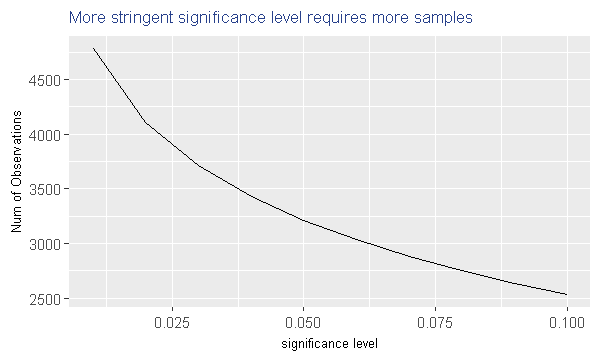

In [185]:
# Determine the range of sig.level
var = seq(from = 0.01, to = 0.10, by = 0.01)

# Hold the rest of the variables constant
p1 = 0.10
sig.level = var
power = 0.8
mde = 0.02

# Create dataframe to show the data
data <- data.frame(matrix(NA, nrow = length(var), ncol = 6))
names(data) <- c("n", "p1", "p2", "sig.level", "power", "mde")

# fill the dataframe
data$p1 = p1
data$sig.level = var
data$power = power
data$mde = mde
data$p2 = data$p1 - data$mde

# calculate the number of observations needed to satisfy the power and siginificance level requirements
data$n <- sapply(data$sig.level, function(x) power.prop.test(sig.level= x, 
                                                      p1= p1, 
                                                      p2= p1-mde, 
                                                      power= power)$n)

plot <- ggplot(data, aes(x= sig.level, y= n)) + 
    geom_line() +
    ggtitle("More stringent significance level requires more samples") +
    xlab("significance level") + 
    ylab("Num of Observations") + 
    theme(
        plot.title = element_text(size=10, color = "royalblue4"),
        axis.title.x = element_text(size=8),
        axis.title.y = element_text(size=8))
plot

### How does the number of required observations change for different required power?

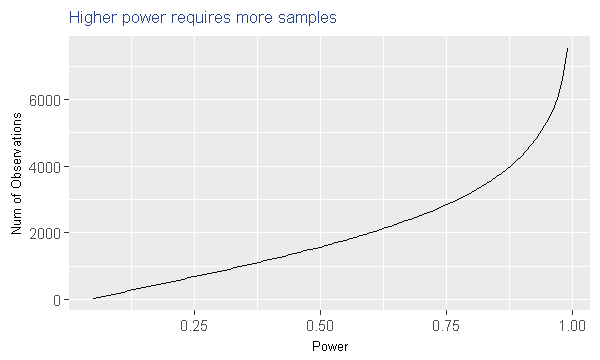

In [214]:
# Determine the range of Power
var = seq(from = 0.05, to = 0.99, by = 0.01)

# Hold the rest of the variables constant
p1 = 0.10
sig.level = 0.05
power = var
mde = 0.02

# Create dataframe to show the data
data <- data.frame(matrix(NA, nrow = length(var), ncol = 6))
names(data) <- c("n", "p1", "p2", "sig.level", "power", "mde")

# fill the dataframe
data$p1 = p1
data$sig.level = sig.level
data$power = var
data$mde = mde
data$p2 = data$p1 - data$mde

# calculate the number of observations needed to satisfy the power and siginificance level requirements
data$n <- sapply(data$power, function(x) power.prop.test(sig.level= sig.level, 
                                                         p1= p1, 
                                                         p2= p1-mde, 
                                                         power= x)$n)

plot <- ggplot(data, aes(x= power, y= n)) + 
    geom_line() +
    ggtitle("Higher power requires more samples") +
    xlab("Power") + 
    ylab("Num of Observations") + 
    theme(
        plot.title = element_text(size=10, color = "royalblue4"),
        axis.title.x = element_text(size=8),
        axis.title.y = element_text(size=8))
plot

### Multiple Facets

In [225]:
myFunc <- function(p1, p2, sig.level, power){
    power.prop.test(n = NULL,
                    p1= p1, 
                    p2= p2, 
                    sig.level= sig.level, 
                    power= power,
                   )$n}
    

In [309]:
mde = seq(from = 0.01, to = 0.03, length.out = 3)
p1 = seq(from = 0.10, to = 0.70, length.out = 7)
sig.level = seq(from = 0.01, to = 0.05, length.out = 5)
power = seq(from = 0.50, to = 0.90, length.out = 5)

In [310]:
df = expand.grid(p1 = p1, mde = mde, sig.level = sig.level, power = power)

In [311]:
df$p2 = df$p1 - df$mde

In [312]:
df$n = mapply(myFunc, df$p1, df$p2, df$sig.level, df$power)

### How does the # of samples change given changes in the baseline probability in the Control (group1) for different minimumal detectable effects.

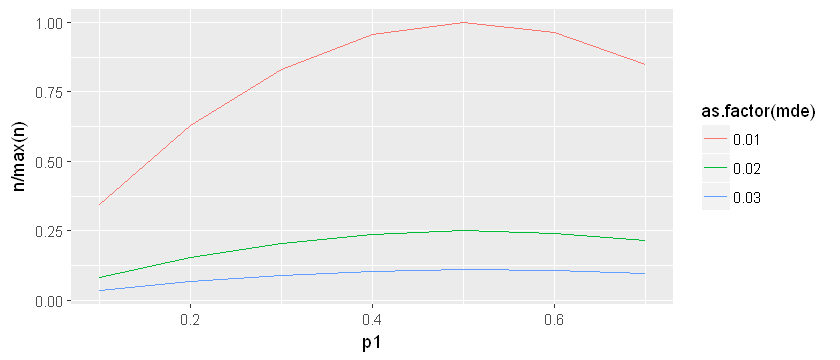

In [313]:
data <- df %>%
filter(sig.level == 0.05, power == 0.8)

plot <- ggplot(data, aes(x=p1, y=n/max(n), colour = as.factor(mde))) + geom_line() 
plot

In [350]:
# set size of chart
options(repr.plot.width=7, repr.plot.height=3)

# http://www.cookbook-r.com/Graphs/Facets_(ggplot2)/

### How does the # of samples change given different Power, Significant level, and Minimual Detectable Effect

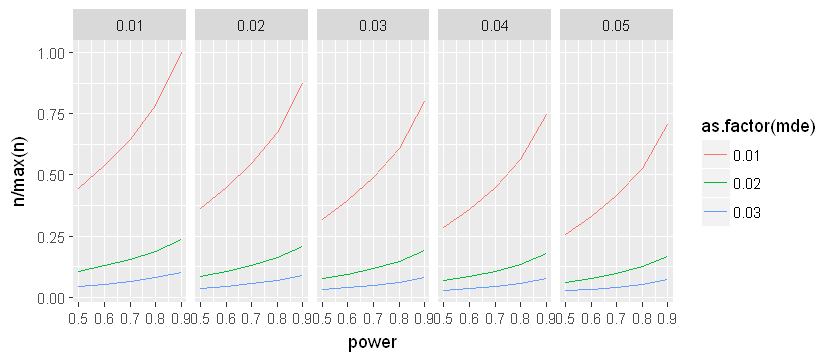

In [351]:
data <- df %>%
filter(p1 == min(p1))

plot <- ggplot(data, aes(x = power, y=n/max(n), colour = as.factor(mde))) + geom_line() + facet_grid( . ~ sig.level)
plot

### How does the # sample change with respect to changes in significant level and power

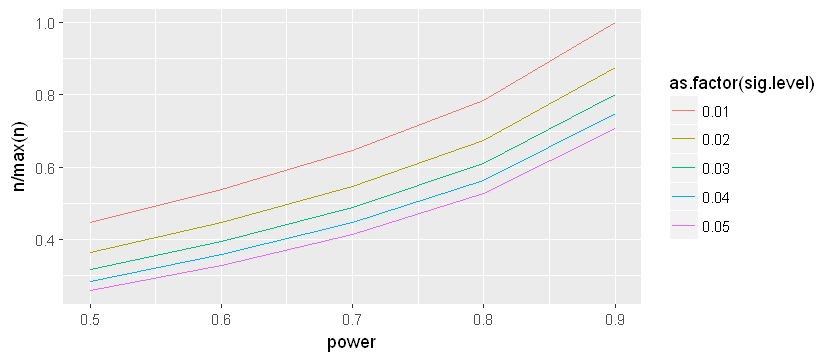

In [352]:
data <- df %>%
filter(p1 == min(p1), mde == 0.01)

plot <- ggplot(data, aes(x = power, y=n/max(n), colour = as.factor(sig.level))) + geom_line()
plot

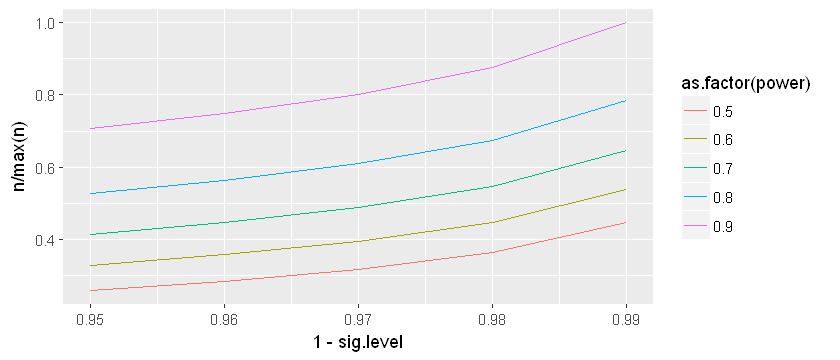

In [353]:
data <- df %>%
filter(p1 == min(p1), mde == 0.01)

plot <- ggplot(data, aes(x = 1-sig.level, y=n/max(n), colour = as.factor(power))) + geom_line()
plot

In [ ]:
df$p1, df$p2, df$sig.level, df$power)